In [154]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [155]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


REQUIRED LAB

In [156]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [157]:
import pandas as pd

In [158]:
SalaryData_Test_data = pd.read_csv("SalaryData_Test.csv")

In [159]:
SalaryData_Train_data = pd.read_csv("SalaryData_Train.csv")

In [160]:
SalaryData_data = pd.concat([SalaryData_Test_data,SalaryData_Train_data])

In [161]:
SalaryData_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [162]:
SalaryData_data.shape

(45221, 14)

In [163]:
SalaryData_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [164]:
list(SalaryData_data)

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native',
 'Salary']

In [165]:
SalaryData_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [167]:
SalaryData_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [168]:
SalaryData_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# <<<<< EXPLORATION DATA ANALYSIS <<<<<


# histograme 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d50b71950>,
      dtype=object)

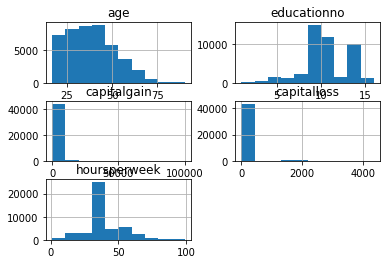

In [169]:
SalaryData_data.hist()

# box plot 


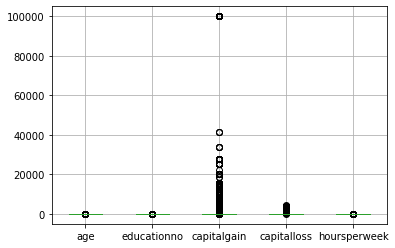

In [170]:
SalaryData_data.boxplot()

In [171]:
# columns names
SalaryData_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

# LabelEncoder


In [172]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [173]:
SalaryData_data.iloc[:,5]
for eachcolumn in range(0,13):
    SalaryData_data.iloc[:,eachcolumn] = LE.fit_transform(SalaryData_data.iloc[:,eachcolumn])

In [174]:
SalaryData_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,<=50K
1,21,2,11,8,2,4,0,4,1,0,0,49,37,<=50K
2,11,1,7,11,2,10,0,4,1,0,0,39,37,>50K
3,27,2,15,9,2,6,0,2,1,96,0,39,37,>50K
4,17,2,0,5,4,7,1,4,1,0,0,29,37,<=50K


# split as X and Y vairables

In [177]:
X = SalaryData_data.iloc[:,0:12]

In [178]:
list(X)

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek']

In [176]:
Y  = SalaryData_data['Salary']

# model development


In [179]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X,Y)

MultinomialNB()

In [180]:
Y_pred = MNB.predict(X)

# confusion matrix and accuracy

In [181]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(Y,Y_pred)
acc = accuracy_score(Y,Y_pred).round(2)
print("naive bayes model accuracy score:" , acc)

naive bayes model accuracy score: 0.78


In [188]:
X[0:12]
MNB.predict(X[0:12])
X.shape
X.iloc[45220,]
MNB.predict([X.iloc[45220,]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


array([' >50K'], dtype='<U6')

In [189]:
MNB.predict([X.iloc[45220,]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


array([' >50K'], dtype='<U6')

In [190]:
# >>>>>>>>>>>>>>>>>>>>>>>> RESULT <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# THE ACCURACY SCORE OF THE ABOVE MODEL IS 78%

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


RESULT : ACCURACY SCORE OF THE ABOVE MODEL IS 78%